In [1]:
import Bio
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
selection_val_dir = '../analysis/selection_values/'
output_dir = '../analysis/output_figures/'

In [5]:
# Read in amino acid level selection value dfs
rep7868_selection_aa_df = pd.read_csv(selection_val_dir + 'rep7868_selection_values_aa.csv',
                                      header=[0], index_col=[0,1,2,3], skipinitialspace=True)
wtaav2_selection_aa_df = pd.read_csv(selection_val_dir + 'wtaav2_selection_values_aa.csv',
                                     header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav5_selection_aa_df = pd.read_csv(selection_val_dir + 'aav5_selection_values_aa.csv',
                                   header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav9_selection_aa_df = pd.read_csv(selection_val_dir + 'aav9_selection_values_aa.csv',
                                   header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav9_selection_aa_df.head()

a         b
abs_pos aa is_wt_aa lib_type                    
1       *  0        del       0.566966  0.362693
                    sub       0.718044  0.716961
        A  0        sub       0.665137  0.815046
        C  0        sub       0.541003  0.492903
        D  0        sub       0.502307  0.583621

In [13]:
# Read in amino acid level selection value dfs (with selection values calculated by summing bc counts across transfections)
rep7868_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'rep7868_selection_values_aa_trans.csv',
                                      header=[0], index_col=[0,1,2,3], skipinitialspace=True)
wtaav2_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'wtaav2_selection_values_aa_trans.csv',
                                     header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav5_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'aav5_selection_values_aa_trans.csv',
                                   header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav9_selection_aa_trans_df = pd.read_csv(selection_val_dir + 'aav9_selection_values_aa_trans.csv',
                                   header=[0], index_col=[0,1,2,3], skipinitialspace=True)
aav5_selection_aa_trans_df.head()

virus
abs_pos aa is_wt_aa lib_type          
1       *  0        del       0.760313
                    sub       0.730094
        A  0        sub       0.734126
        C  0        sub       0.670787
        D  0        sub       1.044962

In [14]:
# Merge dfs with selection values from different experiments
aav2_selection_aa_trans_df = rep7868_selection_aa_trans_df.merge(wtaav2_selection_aa_trans_df, left_index=True, right_index=True)
aav2_selection_aa_trans_df.columns = ['rep7868', 'wtaav2']
aav5_aav9_selection_aa_trans_df = aav5_selection_aa_trans_df.merge(aav9_selection_aa_trans_df, left_index=True, right_index=True)
aav5_aav9_selection_aa_trans_df.columns = ['aav5', 'aav9']
all_selection_aa_trans_df = aav2_selection_aa_trans_df.merge(aav5_aav9_selection_aa_trans_df, left_index=True, right_index=True)
all_selection_aa_trans_df.head()

rep7868    wtaav2      aav5      aav9
abs_pos aa is_wt_aa lib_type                                        
1       *  0        del       0.573863  0.881375  0.760313  0.475319
                    sub       0.568310  0.889059  0.730094  0.717558
        A  0        sub       0.770925  0.723485  0.734126  0.732393
        C  0        sub       0.725970  0.699310  0.670787  0.519423
        D  0        sub       0.583527  1.027844  1.044962  0.538788

In [15]:
def save_fig(fig, fig_name, directory, transparent=True):
    fig_path = os.path.join(directory, fig_name)
    fig.savefig(fig_path, bbox_inches='tight', dpi='figure',transparent=transparent)

In [16]:
# Given df with selection values and column names of replicates of interest plot scatter plot and saves it to output_dir as pdf
def plot_replicate_scatter(selection_df, rep1, rep2, output_dir, figname, x_label, y_label):
    log_selection_df = selection_df.apply(np.log10)
    log_selection_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    log_selection_df.dropna(inplace=True)
    
    fig = plt.figure(figsize=[5,5])
    fig_path = os.path.join(output_dir, figname)
    joint_kws=dict(gridsize=200, cmap='bone', mincnt=2, alpha=1)
    marginal_kws=dict(color='black')
    cmap=plt.cm.jet
    sns.set_style('white')

    g = sns.jointplot(x=log_selection_df[rep1], y=log_selection_df[rep2], kind='hex', color='black', xlim=(-1.2, 0.5),
                      ylim = (-1.2, 0.5), joint_kws=joint_kws, marginal_kws=marginal_kws)

    g.set_axis_labels('log10(s\')\n' + x_label, 'log10(s\')\n' + y_label, size=18)
    cbar_ax = g.fig.add_axes([1, 0.1, .03, .7])
    cb = plt.colorbar(cax=cbar_ax)
    cb.outline.set_visible(True)

    plt.show()
    save_fig(g, figname, output_dir)

<Figure size 500x500 with 0 Axes>

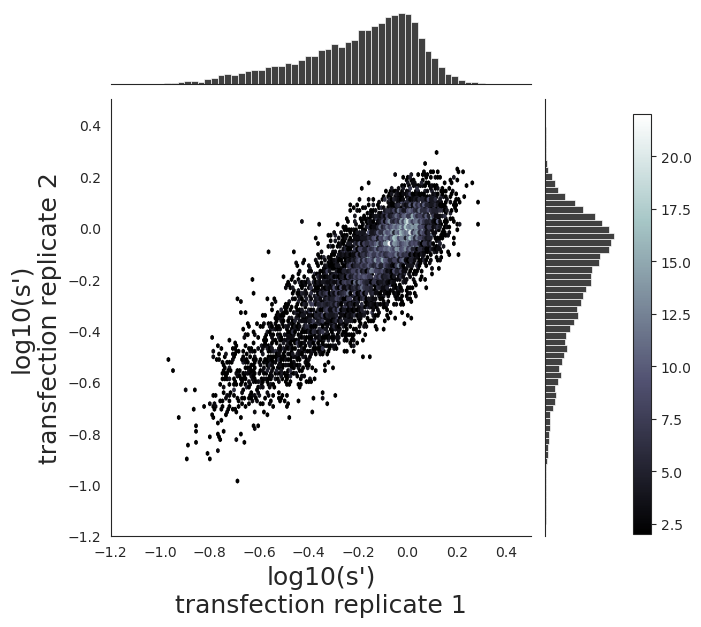

<Figure size 500x500 with 0 Axes>

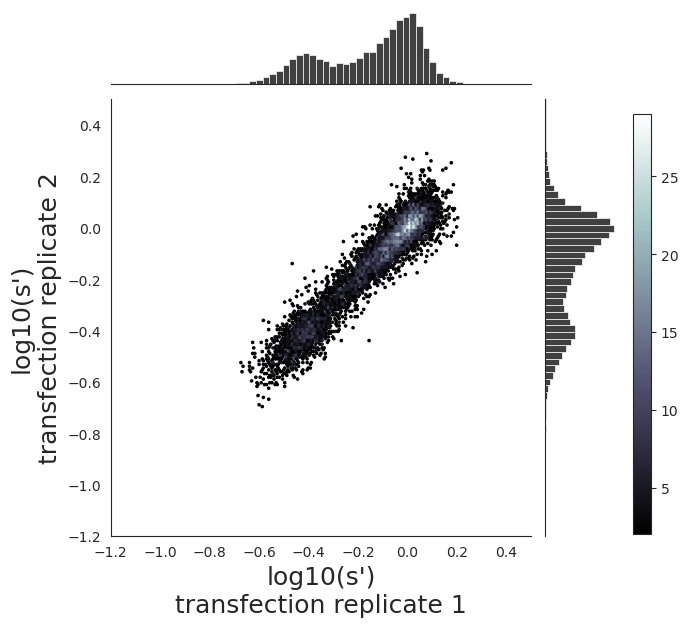

<Figure size 500x500 with 0 Axes>

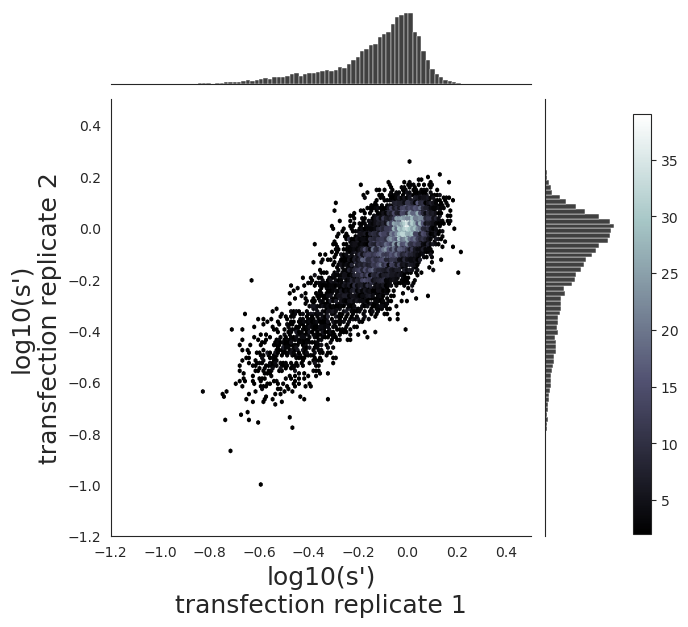

<Figure size 500x500 with 0 Axes>

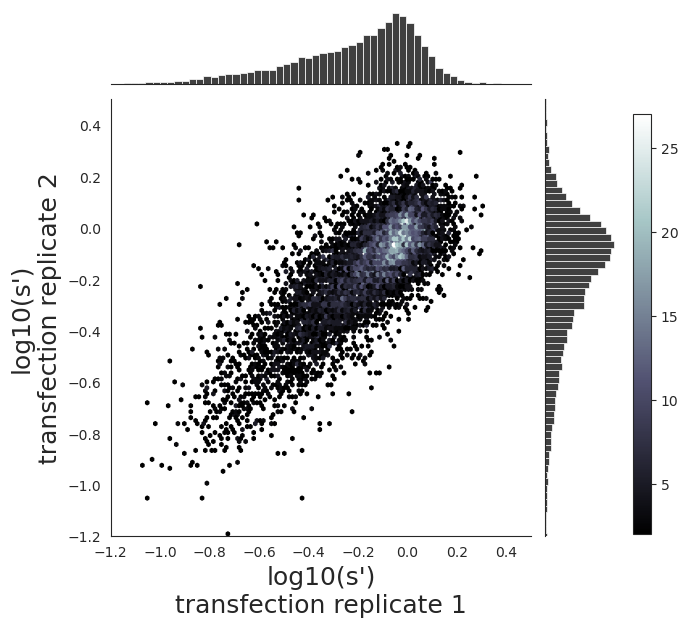

In [28]:
# Plot selection value scatter plots to compare across replicate transfections (amino acid level)
plot_replicate_scatter(rep7868_selection_aa_df, 'a', 'b', output_dir, 'rep7868_trans_rep_scatter.png',
                      'transfection replicate 1', 'transfection replicate 2')
plot_replicate_scatter(wtaav2_selection_aa_df, 'a', 'b', output_dir, 'wtaav2_trans_rep_scatter.png',
                      'transfection replicate 1', 'transfection replicate 2')
plot_replicate_scatter(aav5_selection_aa_df, 'a', 'b', output_dir, 'aav5_trans_rep_scatter.png',
                      'transfection replicate 1', 'transfection replicate 2')
plot_replicate_scatter(aav9_selection_aa_df, 'a', 'b', output_dir, 'aav9_trans_rep_scatter.png',
                      'transfection replicate 1', 'transfection replicate 2')

<Figure size 500x500 with 0 Axes>

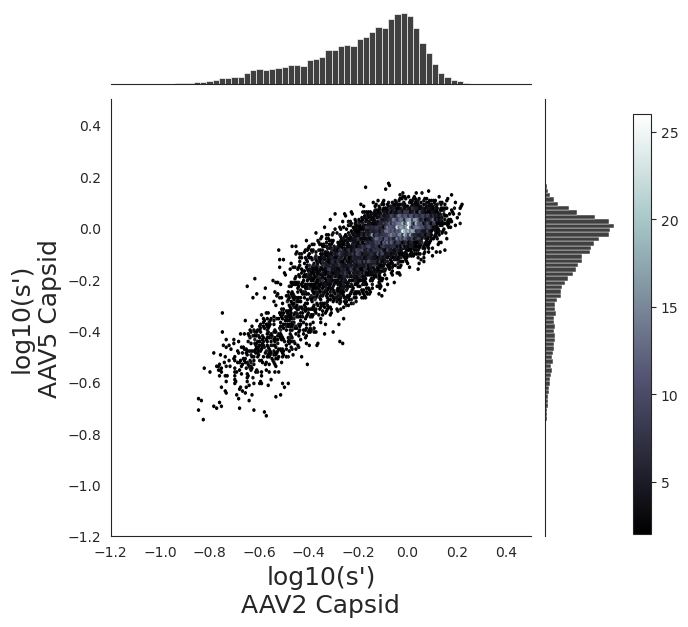

<Figure size 500x500 with 0 Axes>

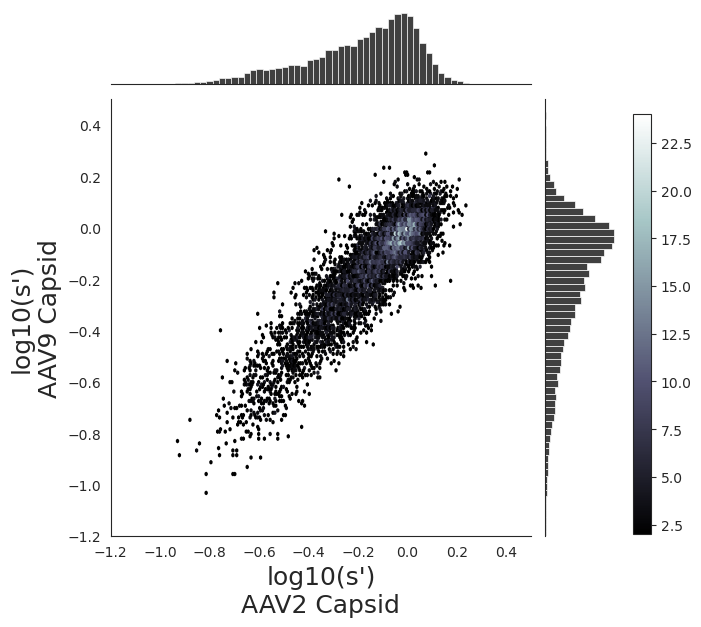

<Figure size 500x500 with 0 Axes>

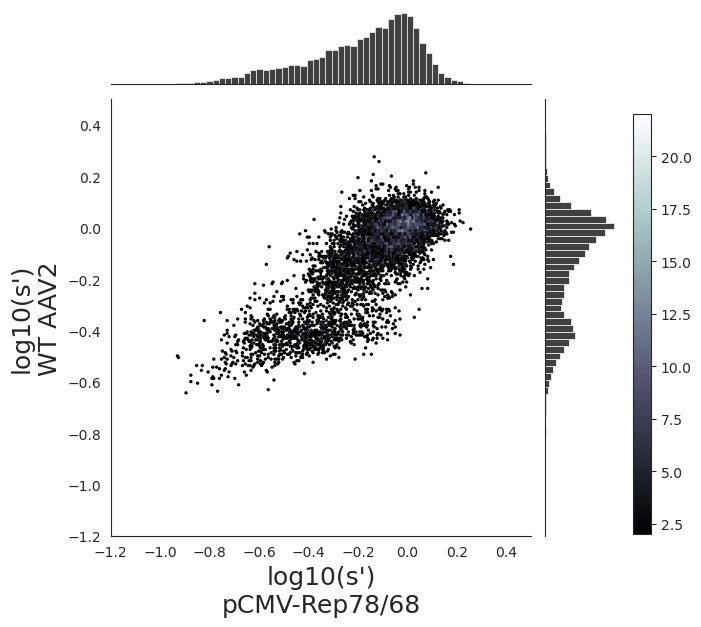

In [25]:
# Plot selection value scatter plots to compare across libraries (amino acid level)
plot_replicate_scatter(all_selection_aa_trans_df, 'rep7868', 'aav5', output_dir, 'rep7868_vs_aav5_selection_values_aa.png', 'AAV2 Capsid', 'AAV5 Capsid')
plot_replicate_scatter(all_selection_aa_trans_df, 'rep7868', 'aav9', output_dir, 'rep7868_vs_aav9_selection_values_aa.png', 'AAV2 Capsid', 'AAV9 Capsid')
plot_replicate_scatter(all_selection_aa_trans_df, 'rep7868', 'wtaav2', output_dir, 'rep7868_vs_wtaav2_selection_values_aa.png', 'pCMV-Rep78/68', 'WT AAV2')